# Regression: Ridge Regression (interpretation)
## Coursera University of Washington ML specialization Regression course week 5 assignment

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a scikit-learn to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a scikit learn to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

# Load the data set to a data frame

In [130]:
import numpy as np
import pandas as pd
import os

# dictionary with dataset column names and their corresponding data types
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

#os.chdir('.\data')
sales_df = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
sales_df.sort_values(by=['sqft_living', 'price'], inplace=True)
sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


The target variable that we want to predict is price and the input features that we consider is just sqft_living

In [131]:
sqft_living = sales_df.loc[:, 'sqft_living'].values.reshape(-1, 1)
price = sales_df.loc[:, 'price'].values.reshape(-1, 1)    

Use sklearn polynomial feature which accepts an array ‘feature’ in fit_transform method and a maximal ‘degree’ in constructor and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [132]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_features(degree_n, input_features):
    polynomial_features = PolynomialFeatures(degree=degree_n)
    return polynomial_features.fit_transform(input_features)    

In [133]:
poly1_data = create_polynomial_features(1, sqft_living)

Write a function to:
1. Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
2. Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
3. Plot the predicted price on top of the scatter plot of sft-living vs price at the current degree
4. Print the model statistics (on the training data) viz mean-squared-error aka RSS and r2-score at the current degree

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

deg_color_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'cyan', 5: 'grey', 6: 'gold', 7: 'lavender', 8: 'lime', 9: 'magenta', 15: 'coral'}

def regression_degree_n(degree_n, data, regressor):
    # data : data frame containing both input features and target variable
    # returns : The coefficient of degree 1 i.e. theta1
    input_features = data.loc[:, 'sqft_living'].values.reshape(-1, 1)
    y = data.loc[:, 'price'].values.reshape(-1, 1)    
    input_features_degree_n = create_polynomial_features(degree_n, input_features)    
    regressor.fit(input_features_degree_n, y)
    predicted_y = regressor.predict(input_features_degree_n)        
    rmse_deg = np.sqrt(mean_squared_error(y, predicted_y))
    r2_deg = r2_score(y, predicted_y)
    plt.plot(input_features, predicted_y, color=deg_color_map[degree_n], label='degree {}'.format(degree_n))            
    print('For model complexity of polynomial degree {}:'.format(degree_n))
    print('The learned coefficients = {}'.format(regressor.coef_))
    print('The root mean squared error = {}, r2_score = {} '.format(rmse_deg, r2_deg, degree_n))
    return regressor.coef_[0][1]


Produce a scatter plot of the training data (sqft-living vs price) and add the fitted model for polynomial degree 1 and 15

For model complexity of polynomial degree 1:
The learned coefficients = [[  0.        280.6235679]]
The root mean squared error = 261440.7903006718, r2_score = 0.492853217903793 
For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00  1.45714455e+04 -4.26493786e+01  7.01294202e-02
  -7.21229980e-05  4.94962538e-08 -2.36022678e-11  8.02653028e-15
  -1.97727508e-18  3.55227200e-22 -4.64439713e-26  4.36330266e-30
  -2.86482576e-34  1.24612442e-38 -3.22231273e-43  3.74558340e-48]]
The root mean squared error = 245407.9123684684, r2_score = 0.5531475937911011 


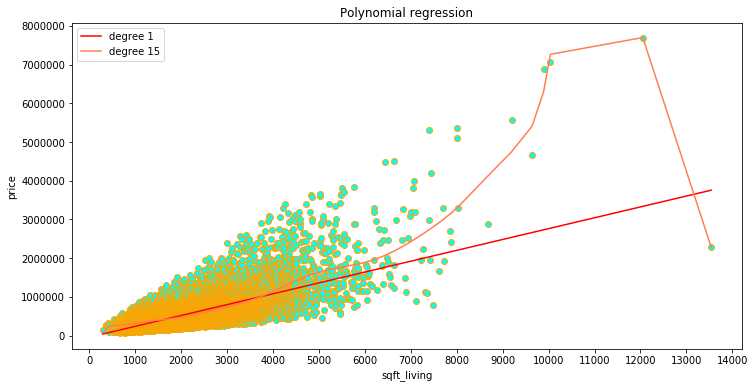

In [135]:
import matplotlib.pyplot as plt

def plot_sqftliving_price(sqft_living, price):
    fig, ax = plt.subplots(figsize=(12,6))    
    plt.plot(sqft_living, price, 'o', mfc='cyan', mec='orange')
    xrange = np.linspace(0, 14000, 15)
    ax.set_xticks(xrange)
    plt.xlabel('sqft_living')
    plt.ylabel('price')    

plot_sqftliving_price(sqft_living, price)
linear_regressor = LinearRegression(normalize=True)
regression_degree_n(1, sales_df, linear_regressor)    
regression_degree_n(15, sales_df, linear_regressor)    
plt.legend()
plt.title('Polynomial regression')    
plt.show()

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00  1.74425503e+02 -7.83644074e-02  3.73280427e-05
  -2.85554311e-09 -2.37487557e-13  9.70529709e-18  1.77791834e-21
   9.76993158e-26  7.78897289e-31 -3.83833667e-34 -4.52940095e-38
  -3.16694117e-42 -1.24102475e-46  4.53456467e-51  1.63425896e-54]]
The root mean squared error = 245825.4614012399, r2_score = 0.5516257070781001 


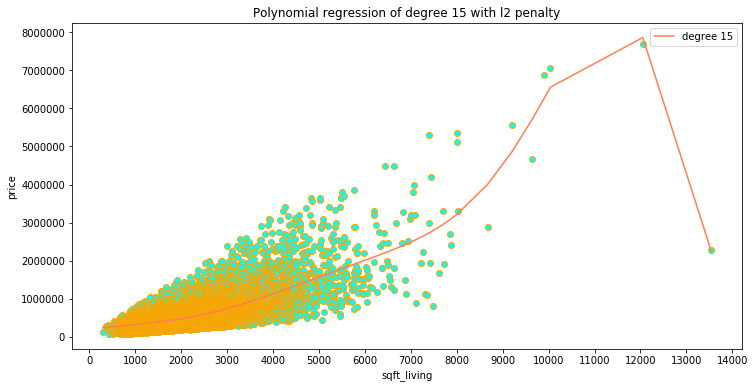

In [136]:
from sklearn.linear_model import Ridge

l2_small_penalty = 1e-5
ridge_regressor = Ridge(alpha=l2_small_penalty, normalize=True)
plot_sqftliving_price(sqft_living, price)
regression_degree_n(15, sales_df, ridge_regressor)    
plt.legend()
plt.title('Polynomial regression of degree 15 with l2 penalty')    
plt.show()

Note the decrease in the value of learned coefficients with a l2 penalty applied

# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

 Please download the provided csv files for each subset and load them with the given list of types:. 

In [137]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

This time use l2_small_penalty=1e-9

For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00  5.44669422e+02 -3.55447632e-01  1.22446396e-04
  -1.17175357e-08 -3.90511922e-13 -1.39076180e-17  1.47860203e-20
   6.87492436e-25 -7.57203634e-29 -1.04097353e-32 -3.71843974e-37
   3.39989223e-41  5.56592030e-45  2.53761459e-49 -3.35152947e-53]]
The root mean squared error = 248690.42094774445, r2_score = 0.5961683903529544 


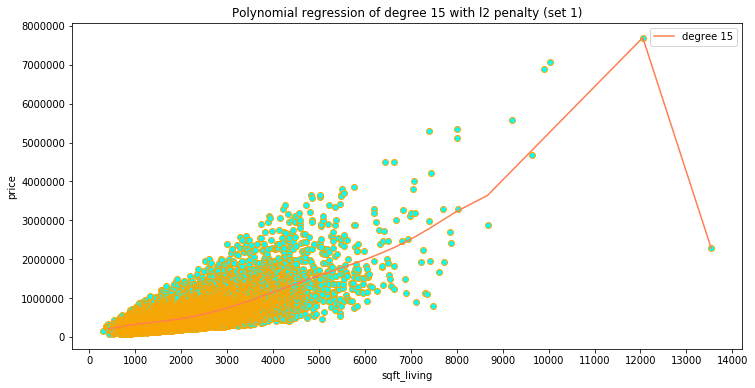

In [153]:
l2_smaller_penalty=1e-9
coeff_deg1_list = []
ridge_regressor_smaller = Ridge(alpha=l2_smaller_penalty, normalize=True)

def fit_and_plot_model(data, regressor, coef_deg1, label):
    plot_sqftliving_price(sqft_living, price)
    coef_deg1_1 = regression_degree_n(15, data, regressor)    
    coef_deg1.append(coef_deg1_1)    
    plt.legend()
    plt.title('Polynomial regression of degree 15 with l2 penalty ({})'.format(label))    
    plt.show()
    
fit_and_plot_model(set_1, ridge_regressor_smaller, coeff_deg1_list, 'set 1')    

For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00  8.59362601e+02 -8.18118197e-01  4.28879916e-04
  -9.12770356e-08 -2.69605158e-12  3.73980389e-15 -1.42711897e-19
  -6.30794735e-23 -1.44559659e-27  7.44321331e-31  9.25866115e-35
   3.27978174e-41 -1.29543472e-42 -1.38781289e-46  1.66546458e-50]]
The root mean squared error = 234510.0417395939, r2_score = 0.5405841999416404 


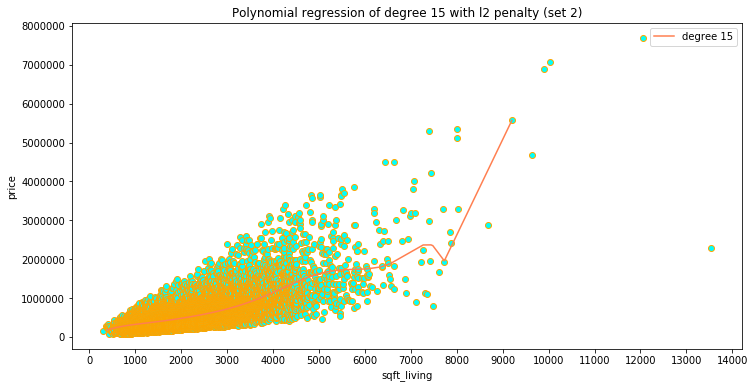

In [154]:
fit_and_plot_model(set_2, ridge_regressor_smaller, coeff_deg1_list, 'set 2')    

For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00 -7.55395855e+02  9.75579404e-01 -4.58945921e-04
   7.77957837e-08  7.15013802e-12 -2.88601988e-15 -2.13678836e-20
   3.38085299e-23  2.19178248e-27 -1.97067882e-31 -4.15993131e-35
  -1.80196174e-39  3.19071145e-43  5.08456949e-47 -3.93304279e-51]]
The root mean squared error = 251043.67802386067, r2_score = 0.5716973080461287 


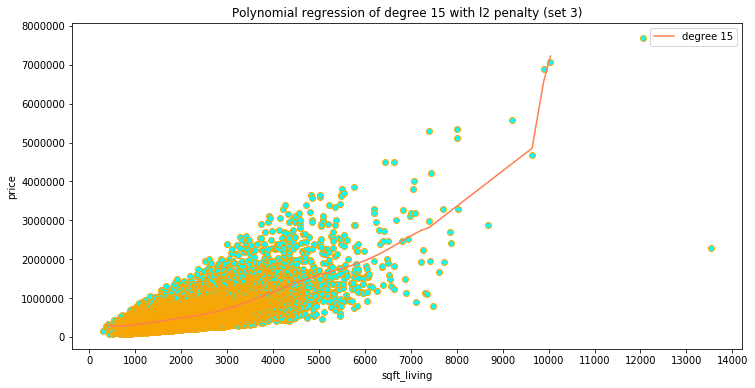

In [155]:
fit_and_plot_model(set_3, ridge_regressor_smaller, coeff_deg1_list, 'set 3')    

For model complexity of polynomial degree 15:
The learned coefficients = [[ 0.00000000e+00  1.11944567e+03 -9.83760158e-01  3.38770868e-04
   3.60377245e-08 -4.37813990e-11  5.77191572e-15  7.66795382e-19
  -9.49297723e-23 -1.96030799e-26 -2.10887873e-32  3.31005122e-34
   3.47733899e-38 -2.43039264e-42 -8.79553360e-46  6.44569728e-50]]
The root mean squared error = 244318.9543808554, r2_score = 0.498254632049953 


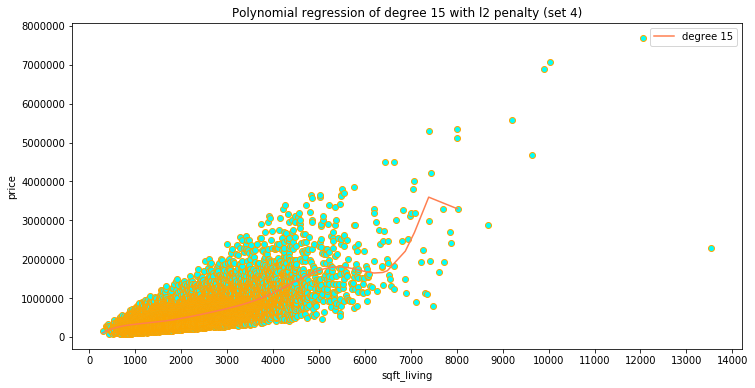

In [156]:
fit_and_plot_model(set_4, ridge_regressor_smaller, coeff_deg1_list, 'set 4')    

The four curves should differ from one another a lot, as should the coefficients you learned.

***QUIZ QUESTION:  For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?***  (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [157]:
sorted_coef_deg1 = sorted(coeff_deg1_list)
print(sorted_coef_deg1)

[-755.3958545065399, 544.6694215156324, 859.3626005371593, 1119.445668200403]


# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above. 

In [161]:
l2_big_penalty = 1.23e2
coeff_deg1_list_2 = []
ridge_regressor_big = Ridge(alpha=l2_big_penalty, normalize=True)


For model complexity of polynomial degree 15:
The learned coefficients = [[0.00000000e+00 2.32806803e+00 3.53621608e-04 3.31969692e-08
  2.00082477e-12 1.11492559e-16 6.57786122e-21 4.12939525e-25
  2.70393755e-29 1.81614763e-33 1.23824277e-37 8.51872481e-42
  5.89455598e-46 4.09542560e-50 2.85464889e-54 1.99547476e-58]]
The root mean squared error = 385880.6003351066, r2_score = 0.027727312086064382 


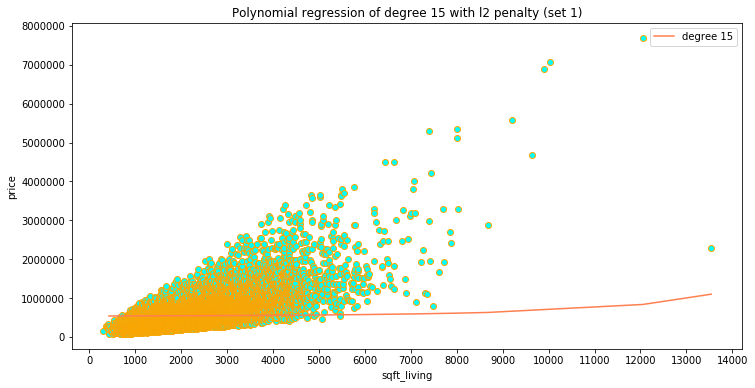

In [162]:
fit_and_plot_model(set_1, ridge_regressor_big, coeff_deg1_list_2, 'set 1')    

For model complexity of polynomial degree 15:
The learned coefficients = [[0.00000000e+00 2.09756903e+00 3.90817483e-04 6.67189944e-08
  8.90002997e-12 9.72639877e-16 9.69733682e-20 9.50564475e-24
  9.44491031e-28 9.57191338e-32 9.86945155e-36 1.03101115e-39
  1.08729784e-43 1.15453748e-47 1.23211305e-51 1.31986696e-55]]
The root mean squared error = 338902.8923550551, r2_score = 0.040525162091826106 


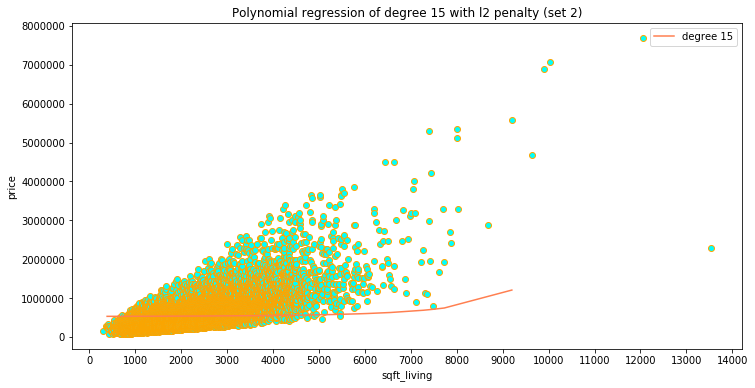

In [163]:
fit_and_plot_model(set_2, ridge_regressor_big, coeff_deg1_list_2, 'set 2')    

For model complexity of polynomial degree 15:
The learned coefficients = [[0.00000000e+00 2.28906258e+00 4.12472190e-04 6.08835345e-08
  6.58572163e-12 6.15278155e-16 5.64446634e-20 5.28834396e-24
  5.07091402e-28 4.94657273e-32 4.88043809e-36 4.85009106e-40
  4.84161534e-44 4.84635021e-48 4.85883628e-52 4.87558469e-56]]
The root mean squared error = 373399.20210449386, r2_score = 0.052456848600793915 


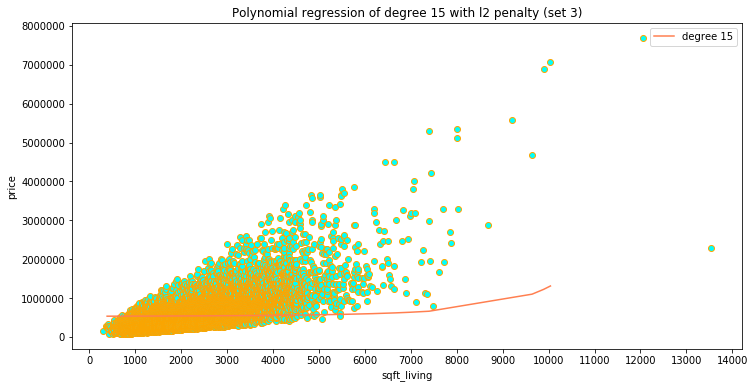

In [164]:
fit_and_plot_model(set_3, ridge_regressor_big, coeff_deg1_list_2, 'set 3')   

For model complexity of polynomial degree 15:
The learned coefficients = [[0.00000000e+00 2.08596194e+00 4.05035772e-04 7.46864647e-08
  1.13096608e-11 1.45864442e-15 1.73561251e-19 2.01609632e-23
  2.34605255e-27 2.75636073e-31 3.27043069e-35 3.91046855e-39
  4.70118041e-43 5.67212304e-47 6.85958087e-51 8.30843630e-55]]
The root mean squared error = 338046.6970160797, r2_score = 0.03944454323754498 


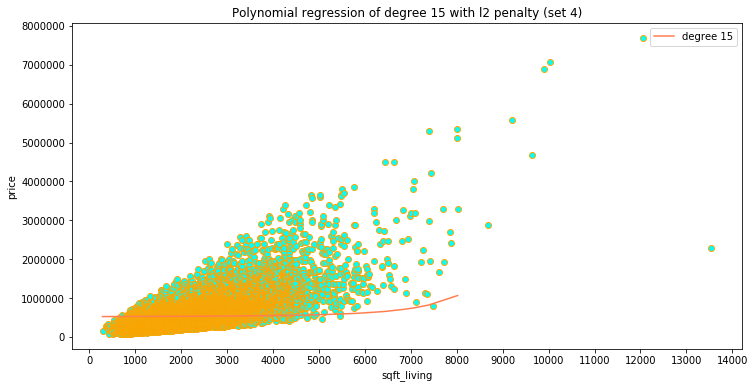

In [165]:
fit_and_plot_model(set_4, ridge_regressor_big, coeff_deg1_list_2, 'set 4')   

These curves should vary a lot less, now that you applied a high degree of regularization.

***QUIZ QUESTION:  For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?*** (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [166]:
sorted_coef_deg1_2 = sorted(coeff_deg1_list_2)
print(sorted_coef_deg1_2)

[2.085961940919307, 2.0975690277785537, 2.2890625811892034, 2.328068029579322]


# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. For the purpose of this assignment, let us download the csv file containing pre-shuffled rows of training and validation sets combined: wk3_kc_house_train_valid_shuffled.csv. In practice, you would shuffle the rows with a dynamically determined random seed.

In [225]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
print(len(train_valid_shuffled))
print(len(test))

19396
2217


Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [174]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (round(start, 0), round(end, 0)))

0 (0.0, 1939.0)
1 (1940.0, 3878.0)
2 (3879.0, 5818.0)
3 (5819.0, 7757.0)
4 (7758.0, 9697.0)
5 (9698.0, 11637.0)
6 (11638.0, 13576.0)
7 (13577.0, 15516.0)
8 (15517.0, 17455.0)
9 (17456.0, 19395.0)


Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [173]:
train_valid_shuffled[0:10] # rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4,2.50,2800,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000.0,3,1.75,2340,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000.0,3,1.00,1320,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000.0,4,2.50,1904,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
5,2781280290,20150427T000000,305000.0,3,2.50,1610,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610,3056
6,2214800630,20141105T000000,239950.0,3,2.25,1560,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920,8120
7,2114700540,20141021T000000,366000.0,3,2.50,1320,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
8,2596400050,20140730T000000,375000.0,3,1.00,1960,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850,8219
9,4140900050,20150126T000000,440000.0,4,1.75,2180,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590,10445


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the `train_valid_shuffled` dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above. Extract the fourth segment (segment 3) and assign it to a variable called `validation4`.

In [202]:
n = len(train_valid_shuffled)
k = 10

def get_segment_indices(num_segments, num_elements):
    k_segments = []
    for i in range(num_segments):
        start = (num_elements*i)/num_segments
        end = (num_elements*(i+1))/num_segments-1
        k_segments.append((int(round(start,0)), int(round(end,0))))
    return k_segments

k_segments = get_segment_indices(k, n)
start_4 = k_segments[3][0]    
end_4 = k_segments[3][1]
validation4 = train_valid_shuffled[start_4:end_4]

To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $536,234.

In [203]:
print(int(round(validation4['price'].mean(), 0)))

536390


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. SFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_valid_shuffled` dataframe.

In [ ]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print first_two.append(last_two)

Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [207]:
pre_validation4 = train_valid_shuffled[0: start_4]
post_validation4 = train_valid_shuffled[end_4+1: n]
train4 = pre_validation4.append(post_validation4)
print(len(validation4))
print(len(train4))

<class 'pandas.core.frame.DataFrame'>
1938
17457


To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $539,450.

In [200]:
print(int(round(train4['price'].mean(), 0)))

539446


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [218]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list, degree_n):
    n = len(data)
    k_segments = get_segment_indices(k, n)
    k_validation_errors = []
    # generate polynomial features from the given input features
    X = data.loc[:, features_list].values.reshape(-1, 1)
    y = data.loc[:, output_name].values.reshape(-1, 1)    
    poly_X = create_polynomial_features(degree_n, X)    
    poly_data = np.concatenate((poly_X, y), axis=1)
    for i, segment in enumerate(k_segments):
        start_i = k_segments[i][0]    
        end_i = k_segments[i][1]
        validation_i = poly_data[start_i:end_i]
        pre_validation_i = poly_data[0: start_i]
        post_validation_i = poly_data[end_i+1: n]
        train_i = np.concatenate((pre_validation_i, post_validation_i), axis=0)
        regressor = Ridge(alpha=l2_penalty, normalize=True)
        # exclude the last column which is the output variable y to get X
        train_X = train_i[:, 0:-1]
        valid_X = validation_i[:, 0:-1]
        # the last column is y
        train_y = train_i[:, -1]
        valid_y = validation_i[:, -1]    
        regressor.fit(train_X, train_y)
        valid_predicted_y = regressor.predict(valid_X)        
        rss = np.sum((valid_y - valid_predicted_y)**2)
        k_validation_errors.append(rss)
    return np.mean(k_validation_errors)

result = k_fold_cross_validation(10, 1000, train_valid_shuffled, 'price', ['sqft_living'], 15)
print(result)

264762174851549.7


Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For each l2_penalty in [10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9] (to get this in Python, you can use this Numpy function: np.logspace(3, 9, num=13).): Run   10-fold cross-validation with l2_penalty.
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [221]:
penalty_rss_list = []
for penalty in np.logspace(3, 9, num=13):
    result = k_fold_cross_validation(10, penalty, train_valid_shuffled, 'price', ['sqft_living'], 15)
    penalty_rss_list.append((penalty, result))
    print('penalty:{} --> rss:{}'.format(penalty, result))

sorted_penalty_rss_list = sorted(penalty_rss_list, key=lambda item:item[1])
print(sorted_penalty_rss_list[0])

penalty:1000.0 --> rss:264762174851549.7
penalty:3162.2776601683795 --> rss:265477415340607.94
penalty:10000.0 --> rss:265708742204044.6
penalty:31622.776601683792 --> rss:265782421110048.2
penalty:100000.0 --> rss:265805773509679.84
penalty:316227.7660168379 --> rss:265813163507659.94
penalty:1000000.0 --> rss:265815500962687.44
penalty:3162277.6601683795 --> rss:265816240184128.9
penalty:10000000.0 --> rss:265816473951800.34
penalty:31622776.60168379 --> rss:265816547876161.5
penalty:100000000.0 --> rss:265816571253150.34
penalty:316227766.01683795 --> rss:265816578645608.6
penalty:1000000000.0 --> rss:265816580983309.75
(1000.0, 264762174851549.7)


***QUIZ QUESTIONS:  What is the best value for the L2 penalty according to 10-fold validation?***

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`. This way, your final model will be trained on the entire dataset.

In [226]:
regressor = Ridge(alpha=sorted_penalty_rss_list[0][0], normalize=True)
X = sales_df.loc[:, 'sqft_living'].values.reshape(-1, 1)
y = sales_df.loc[:, 'price'].values.reshape(-1, 1)    
poly15_X = create_polynomial_features(15, X)    
regressor.fit(poly15_X, y)
# make predictions on the test dataset
X_test = test.loc[:, 'sqft_living'].values.reshape(-1, 1)
poly15_X_test = create_polynomial_features(15, X_test)    
y_test = test.loc[:, 'price'].values.reshape(-1, 1)    
predicted_y_test = regressor.predict(poly15_X_test)        
rss_test = np.sum((y_test - predicted_y_test)**2)

***QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

In [227]:
print(rss_test)

283857157864605.0
